In [1]:
#| echo: False
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph, pinta_tikz, plot_cargas

In [2]:
#| echo: false
#| output: false
#%%capture
%mkdir -p ~/temp
%cd ~/temp

/Users/mcasl/temp


# Enunciado
## Cálculo de la duración de un proyecto usando el Método de Montecarlo

Considere el proyecto cuya información se adjunta.

In [3]:
#| echo: False
pregunta_1 = f"1. Dibuje el grafo PERT del proyecto.  "
pregunta_2 = f"2. Determine la matriz de caminos del proyecto.  "
pregunta_3 = f"3. Calcule, utilizando la matriz de caminos del proyecto, los tiempos tempranos de cada nodo para 1000 iteraciones del método de MonteCarlo.  "
pregunta_4 = f"4. Determina la duración media y la desviación típica de la duración del proyecto.  "
pregunta_5 = f"5. Determine la duración para una probabilidad de completar antes el proyecto del 98%.  "

In [4]:
#| echo: False
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))
display(Markdown(pregunta_5))

1. Dibuje el grafo PERT del proyecto.  

2. Determine la matriz de caminos del proyecto.  

3. Calcule, utilizando la matriz de caminos del proyecto, los tiempos tempranos de cada nodo para 1000 iteraciones del método de MonteCarlo.  

4. Determina la duración media y la desviación típica de la duración del proyecto.  

5. Determine la duración para una probabilidad de completar antes el proyecto del 98%.  

In [5]:
#| tbl-cap: "Cuadro de datos del enunciado del ejercicio"
#| label: tbl-datosEnunciado

import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import numpy as np
import matplotlib as plt
%matplotlib inline

datos_enunciado = pd.DataFrame([
#  actividad, predecesora, duracion media, desviación típica
     ('A',    '---  ', 10, 1.5 ),
     ('B',    '---  ',  5, 0.4 ),
     ('C',    'A    ',  6, 0.8 ),
     ('D',    'A    ',  2, 0.7 ),
     ('E',    'B,C,D',  7, 1.8 ),
     ('F',    'B,D  ',  8, 0.8 ),
     ('G',    'E,F  ',  4, 1.4 ),
     ('H',    'B    ',  7, 1.6 ),
] ,columns=['activity', 'predecessor', 'mean', 'stdev']).set_index('activity')

datos_enunciado

,predecessor,mean,stdev
activity,,,
A,---,10,1.5
B,---,5,0.4
C,A,6,0.8
D,A,2,0.7
E,"B,C,D",7,1.8
F,"B,D",8,0.8
G,"E,F",4,1.4
H,B,7,1.6


## Solución
### Apartado 1

In [6]:
#| echo: False
Markdown(pregunta_1)

1. Dibuje el grafo PERT del proyecto.  

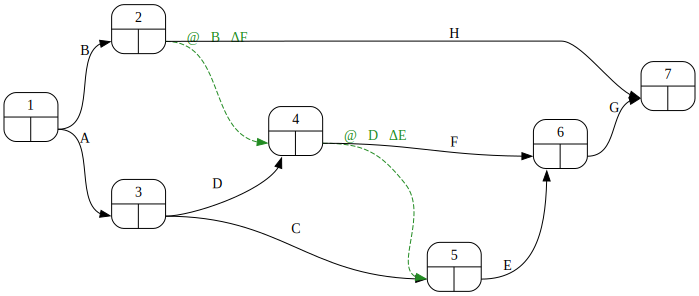

In [7]:
datos_proyecto =  datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
proyecto = prelaciones.create_project()
proyecto.pert(ranksep=0.6, nodesep=0.6)

### Apartado 2

In [8]:
#| echo: False
Markdown(pregunta_2)

2. Determine la matriz de caminos del proyecto.  

In [9]:
path_matrix = proyecto.path_matrix(dummies=False)
proyecto.display_path_matrix(dummies=False)

,A,B,C,D,E,F,G,H
Route_1,1,0,1,0,1,0,1,0
Route_2,1,0,0,1,1,0,1,0
Route_3,1,0,0,1,0,1,1,0
Route_4,0,1,0,0,1,0,1,0
Route_5,0,1,0,0,0,1,1,0
Route_6,0,1,0,0,0,0,0,1


### Apartado 3

In [10]:
#| echo: False
Markdown(pregunta_3)

3. Calcule, utilizando la matriz de caminos del proyecto, los tiempos tempranos de cada nodo para 1000 iteraciones del método de MonteCarlo.  

#### Generación aleatoria de las duraciones de las actividades

In [11]:
number_of_samples = 1000

In [12]:
activity_names = datos_proyecto.index
duration = pd.DataFrame([np.random.normal(size = number_of_samples,
                                          loc  = datos_proyecto.loc[task, 'mean',],
                                          scale= datos_proyecto.loc[task, 'stdev'])
                         for task in activity_names
                        ],
                        index=activity_names)

In [13]:
duration.T.head()

activity,A,B,C,D,E,F,G,H
0,10.925301,4.446971,6.645871,1.839015,6.548168,9.488839,4.176080,4.809138
1,10.336844,4.653989,5.587939,2.459432,6.773722,7.531909,5.320504,8.328515
2,9.900782,5.748689,5.861894,3.397602,2.419875,7.681707,1.904833,6.327645
3,9.023336,4.765365,4.989582,2.432137,7.606742,9.317281,2.558808,8.133549
4,10.867391,5.509260,5.052959,2.227036,8.093987,8.077850,4.918052,9.203615


#### Cálculo de la duración del proyecto

La duración del proyecto se obtiene multiplicando la matriz de caminos por las duraciones de las actividades. El resultado es la duración de las rutas en cada iteración.

In [14]:
duraciones_caminos = path_matrix @ duration   # Multiplicación matricial
duraciones_caminos.T.head()

,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,28.295421,23.488565,26.429235,15.171219,18.111890,9.256109
1,28.019009,24.890501,25.648689,16.748215,17.506402,12.982504
2,20.087384,17.623092,22.884924,10.073397,15.335228,12.076333
3,24.178468,21.621023,23.331562,14.930915,16.641453,12.898914
4,28.932390,26.106467,26.090330,18.521299,18.505162,14.712875


La duración del proyecto en cada iteración se obtiene calculando el máximo de la duración de los caminos en esa iteración.

In [15]:
duracion_proyecto = duraciones_caminos.max(axis="rows").to_frame(name='duracion_proyecto')
duracion_proyecto.head(10)

,duracion_proyecto
0,28.295421
1,28.019009
2,22.884924
3,24.178468
4,28.932390
5,28.135973
6,25.834992
7,31.058014
8,28.493112
9,25.954879


### Apartado 4

In [16]:
#| echo: False
Markdown(pregunta_4)

4. Determina la duración media y la desviación típica de la duración del proyecto.  

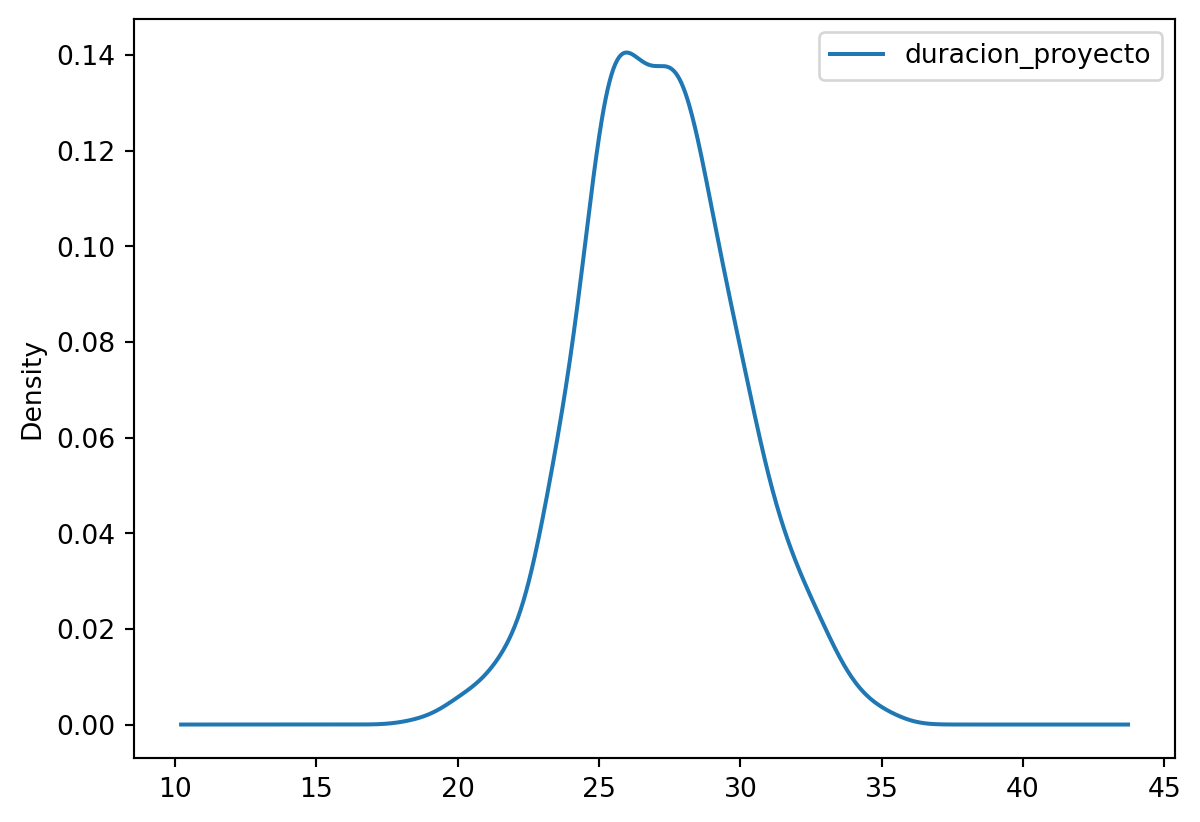

In [17]:
duracion_proyecto.plot(kind='density');

In [18]:
duracion_proyecto.describe()

,duracion_proyecto
count,1000.000000
mean,27.165373
std,2.708426
min,18.588942
25%,25.285334
50%,27.055871
75%,28.937220
max,35.337673


In [19]:
Markdown(f"La duración media del proyecto es: {round(duracion_proyecto.mean(), 1)}, la desviación típica de la duración del proyecto es: {round(duracion_proyecto.std(), 1)}")

La duración media del proyecto es: duracion_proyecto    27.2
dtype: float64, la desviación típica de la duración del proyecto es: duracion_proyecto    2.7
dtype: float64

### Apartado 5

In [20]:
#| echo: False
Markdown(pregunta_5)

5. Determine la duración para una probabilidad de completar antes el proyecto del 98%.  

Podemos ordenar los valores en sentido ascendente y quedarnos con aquél valor superior al 98% de las muestras.

In [21]:
resultado_1 = round(duracion_proyecto.sort_values(ascending=True, by='duracion_proyecto').iloc[int(0.98*number_of_samples),0], 1)

In [22]:
Markdown(f"Podemos ordenar los valores en sentido ascendente y quedarnos con aquél valor superior al 98% de las muestras. De esta manera obtenemos un resultado igual a {resultado_1} periodos")

Podemos ordenar los valores en sentido ascendente y quedarnos con aquél valor superior al 98% de las muestras. De esta manera obtenemos un resultado igual a 33.0 periodos

O bien, utilizando la función `quantile`

In [23]:
resultado_2 = round(duracion_proyecto.quantile(q=0.98, interpolation='higher'), 1)

In [24]:
Markdown(f"O bien, utilizando la función `quantile`, obteniendo igualmente un valor de {resultado_2} periodos.")

O bien, utilizando la función `quantile`, obteniendo igualmente un valor de duracion_proyecto    33.0
Name: 0.98, dtype: float64 periodos.